# EDA

## Load the dataset and explore its structure.


### Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder

warnings.simplefilter(action="ignore", category=FutureWarning)

- pandas: 데이터를 다루기 위해 사용했습니다.
- numpy: 스칼라 연산과 배열을 다루기 위해 사용했습니다.
- matplotlib.pyplot, seaborn: 데이터를 시각적으로 표현하기 위해 사용했습니다.


### Loading the Dataset


In [2]:
path = "data/xAPI-Edu-Data.csv"
df = pd.read_csv(path)

- CSV 파일로부터 데이터를 읽고, 판다스 데이터프레임으로 로드합니다.


In [3]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


- 데이터셋의 첫 5개 열을 가져옵니다.
- 데이터셋의 구조를 이해하는것을 도와줍니다.
- 컬럼이름과 데이터 타입, 값을 확인하도록 도와줍니다.


In [4]:
df.shape

(480, 17)

- 데이터셋의 차원을 row, column으로 나타냅니다.
- 480개의 열과 17개의 컬럼으로 이루어져 있습니다.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

- 다음과 같은 추가적인 정보를 제공합니다:
  - 컬럼이름
  - 데이터 타입
  - 결측값
- 데이터 전처리와 클리닝에 도움이 됩니다.


### Displaying Column Names


In [6]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

- 모든 컬럼의 이름들을 반환합니다.
- 피처를 선정할때 도움이 됩니다.


### Handle missing values and perform basic data cleaning


In [7]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

- 각 컬럼의 결측값의 수를 나타냅니다.
- 결측값을 다룰 때 도움이 됩니다.


## Conduct exploratory data analysis (EDA) using visualizations.


### Categorical & Numerical Feature 선정


In [8]:
categorical_features = df.select_dtypes(include="object").columns
numerical_features = df.select_dtypes(include="number").columns

categorical_features, numerical_features

(Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
        'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
        'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
       dtype='object'),
 Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'], dtype='object'))

- categorical 피처와 numerical 피쳐를 구분합니다.
- 어떤 시각화 방식을 사용할지가 달라집니다.


### 1. Count Plots for Categorical Features


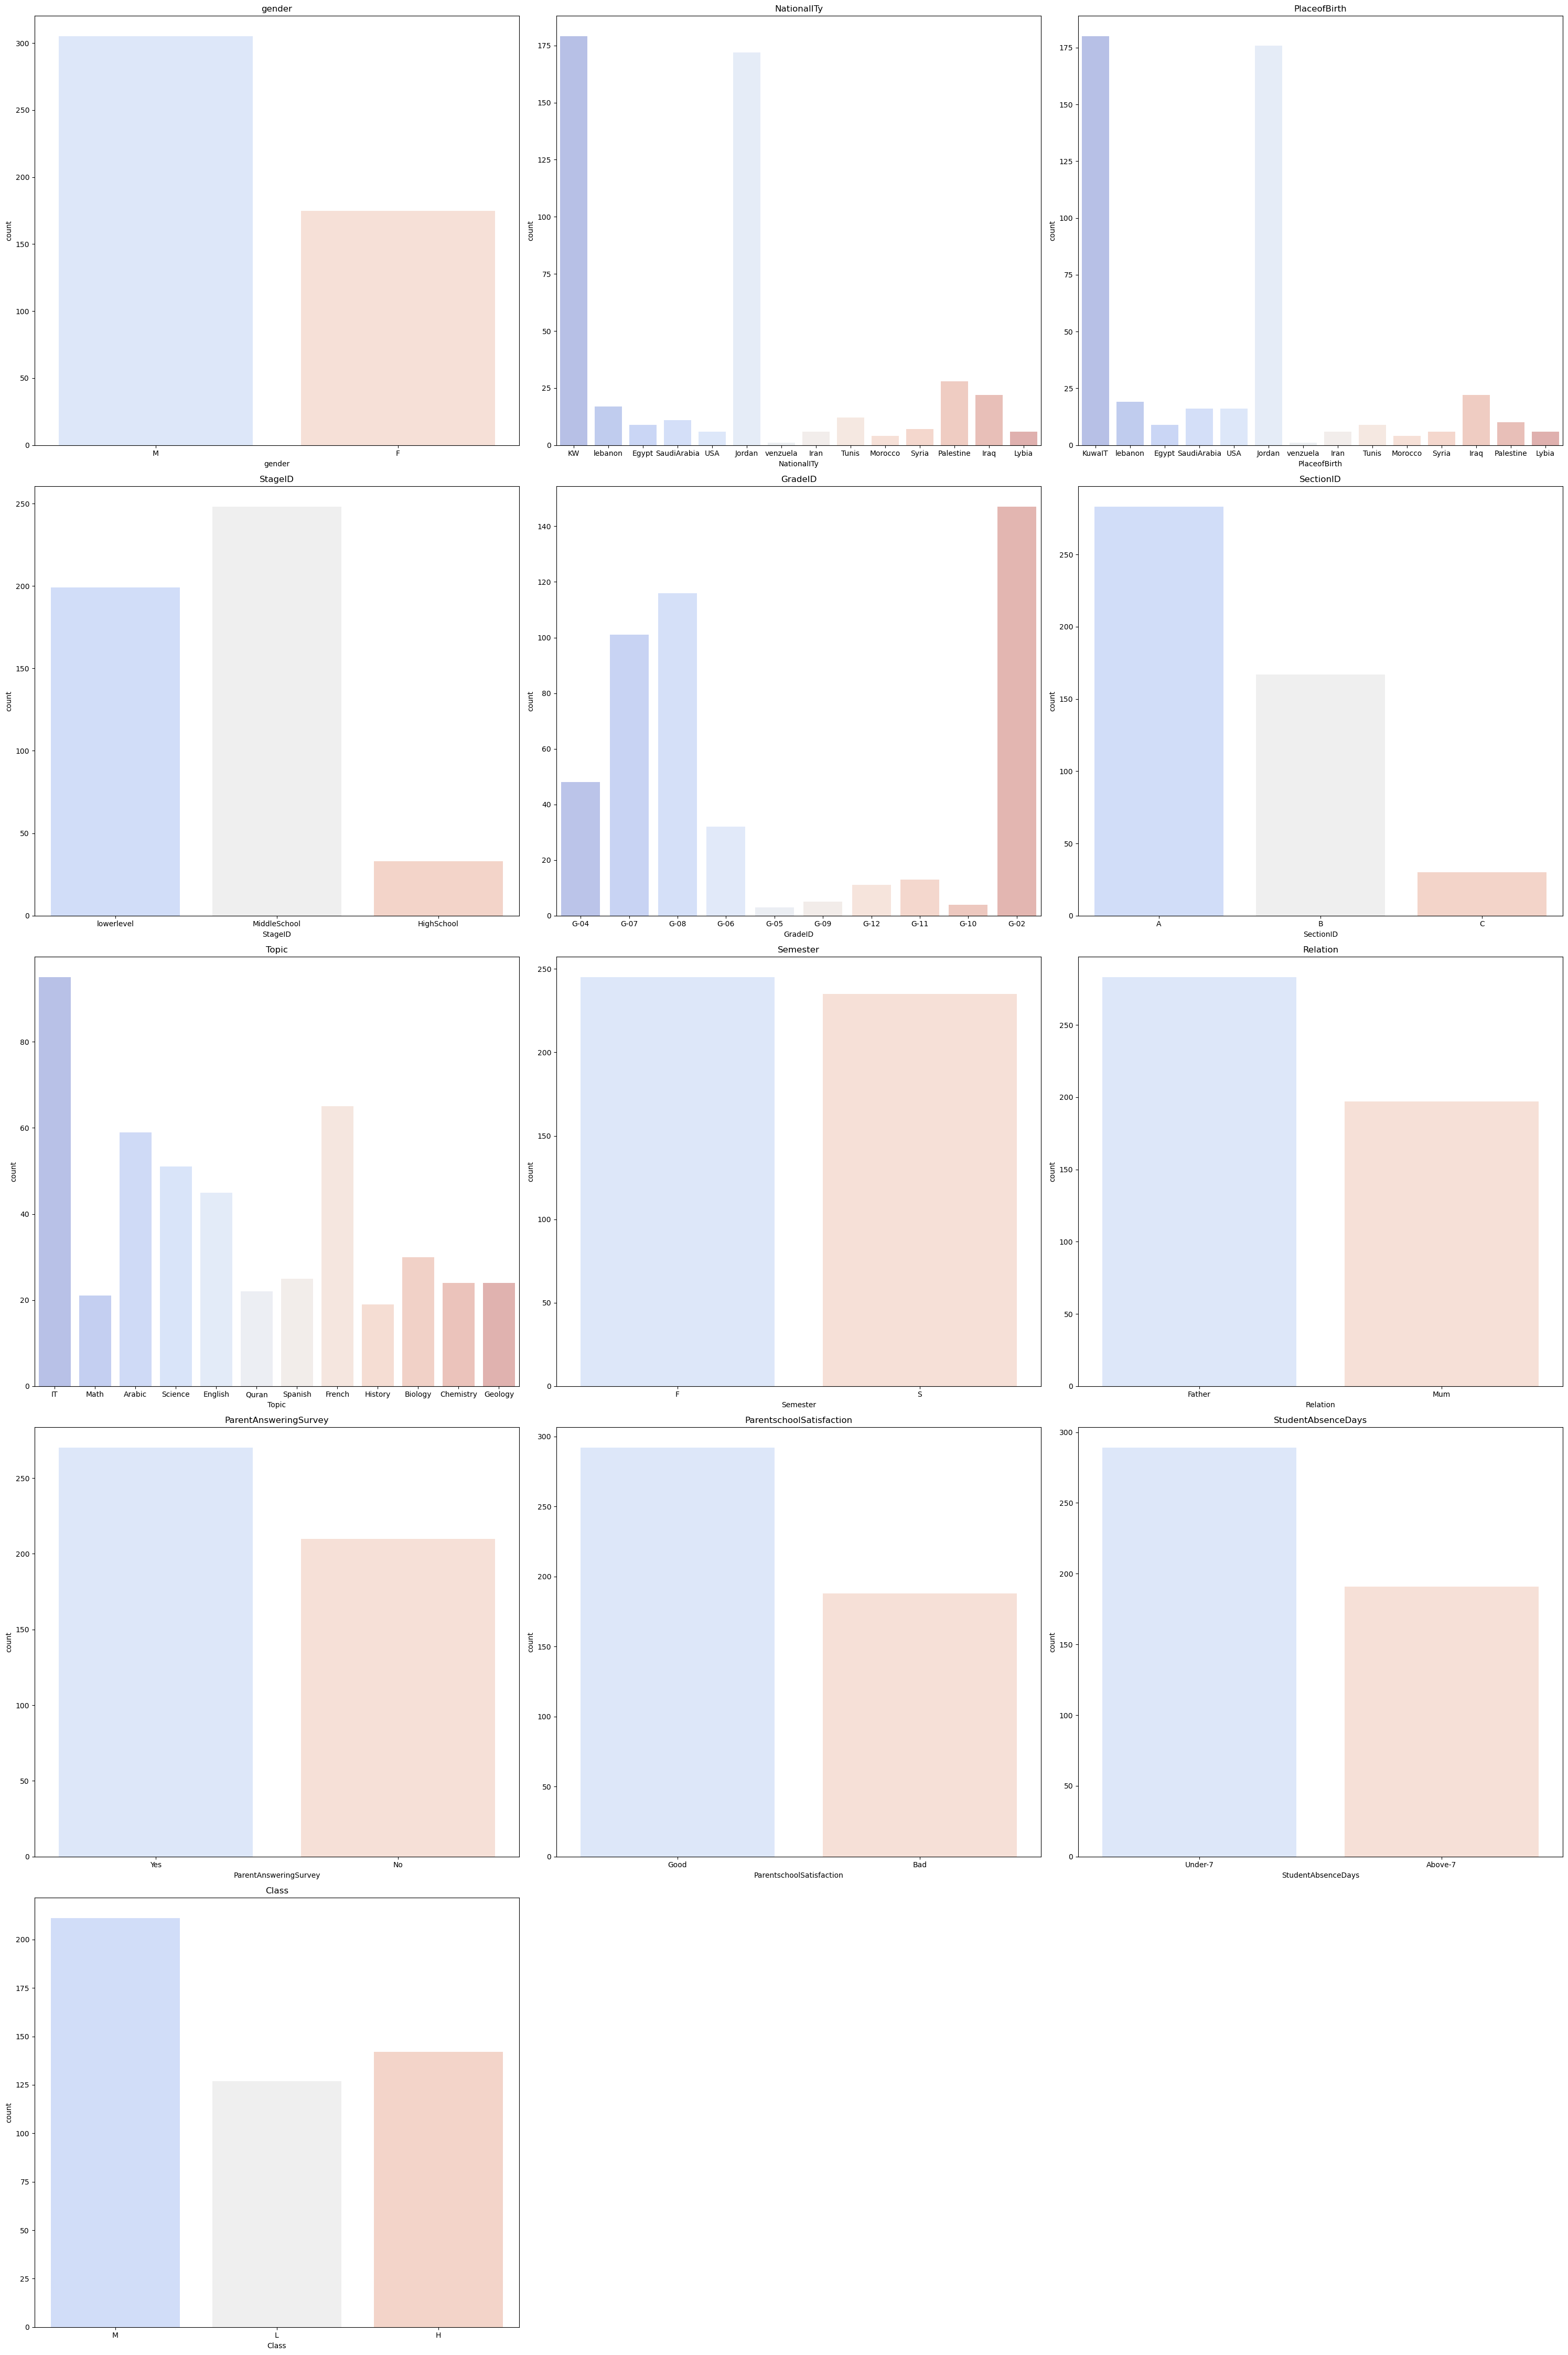

In [9]:
plt.figure(figsize=(30, 45))
for idx, col in enumerate(categorical_features):
    plt.subplot((len(categorical_features) // 3) + 1, 3, idx + 1)
    sns.countplot(x=df[col], palette="coolwarm", alpha=0.45)
    plt.title(col)
plt.tight_layout()
plt.show()

- categorical 피쳐들의 카운트를 시각화합니다.


### 2. Histograms for Numerical Features


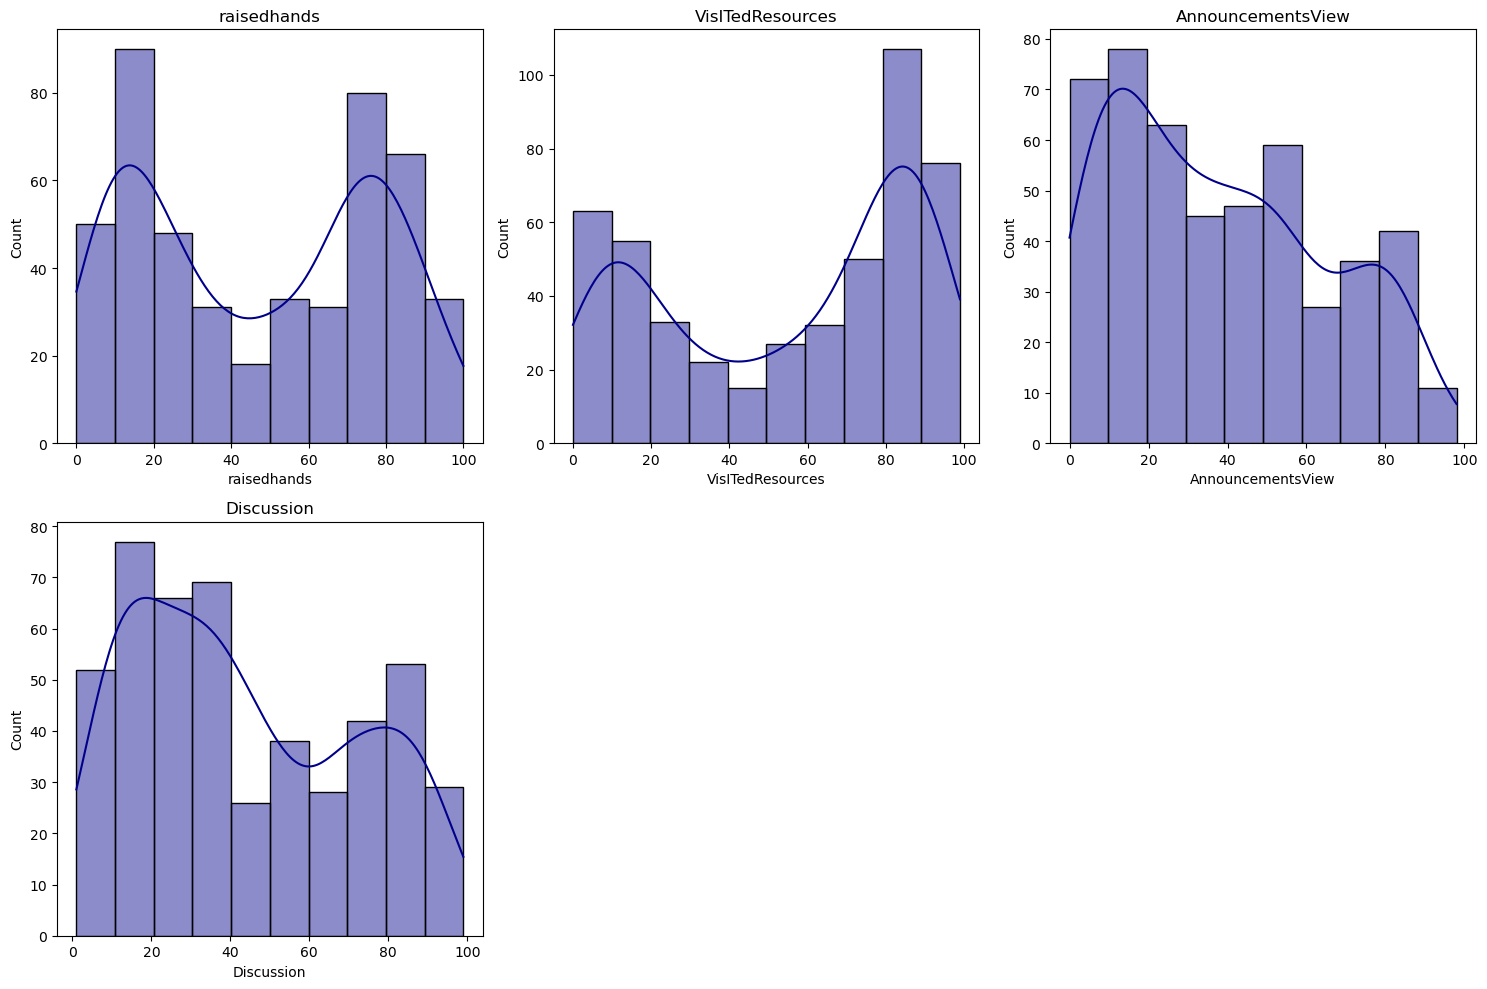

In [10]:
plt.figure(figsize=(15, 10))
for i in range(1, len(numerical_features) + 1):
    plt.subplot((len(numerical_features) // 3) + 1, 3, i)
    sns.histplot(df[numerical_features[i - 1]], kde=True, color="darkblue", alpha=0.45)
    plt.title(numerical_features[i - 1])
plt.tight_layout()
plt.show()

- 히스토그램은 각 numerical 피쳐의 분포를 보여줍니다.
- Kernal Density Estimation curve는 분포를 부드럽게 보여줍니다.


### 3. Boxplots for Numerical Features python Copy Edit


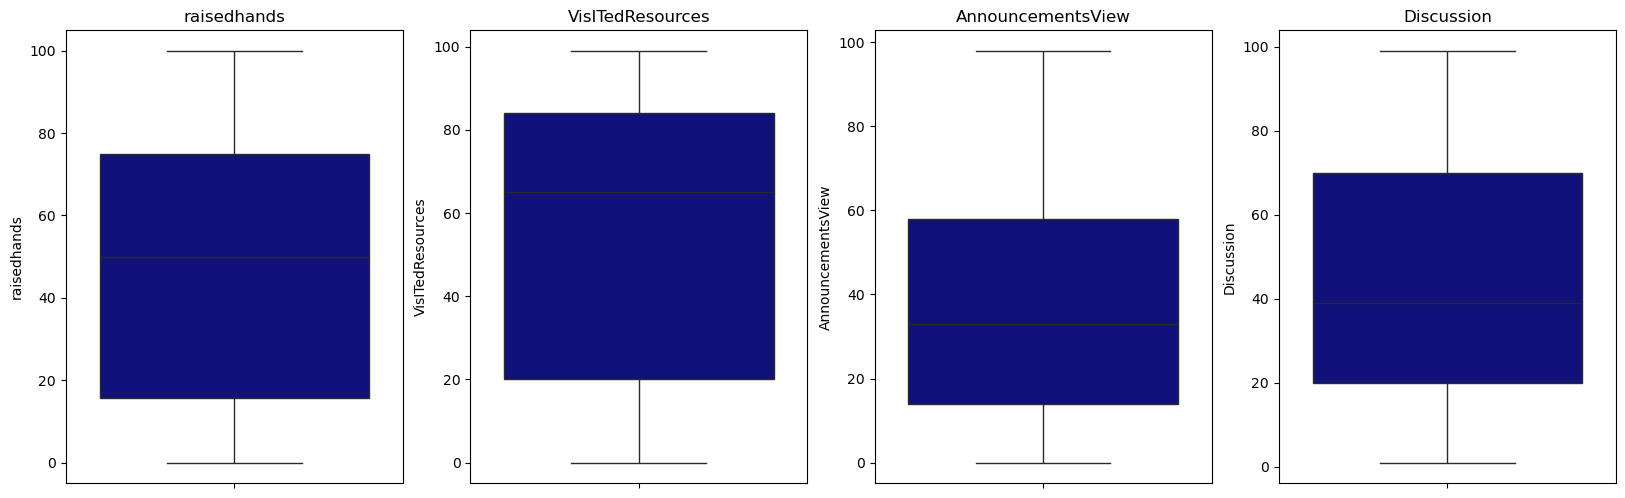

In [11]:
plt.figure(figsize=(20, 20))
for i in range(len(numerical_features)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[numerical_features[i]], color="darkblue")
    plt.title(numerical_features[i])
plt.show()

- 박스플롯은 데이터의 분위수와 이상치를 확인할 수 있게 해줍니다.


### 4. Scatter Plots Between Grades & Numerical Features


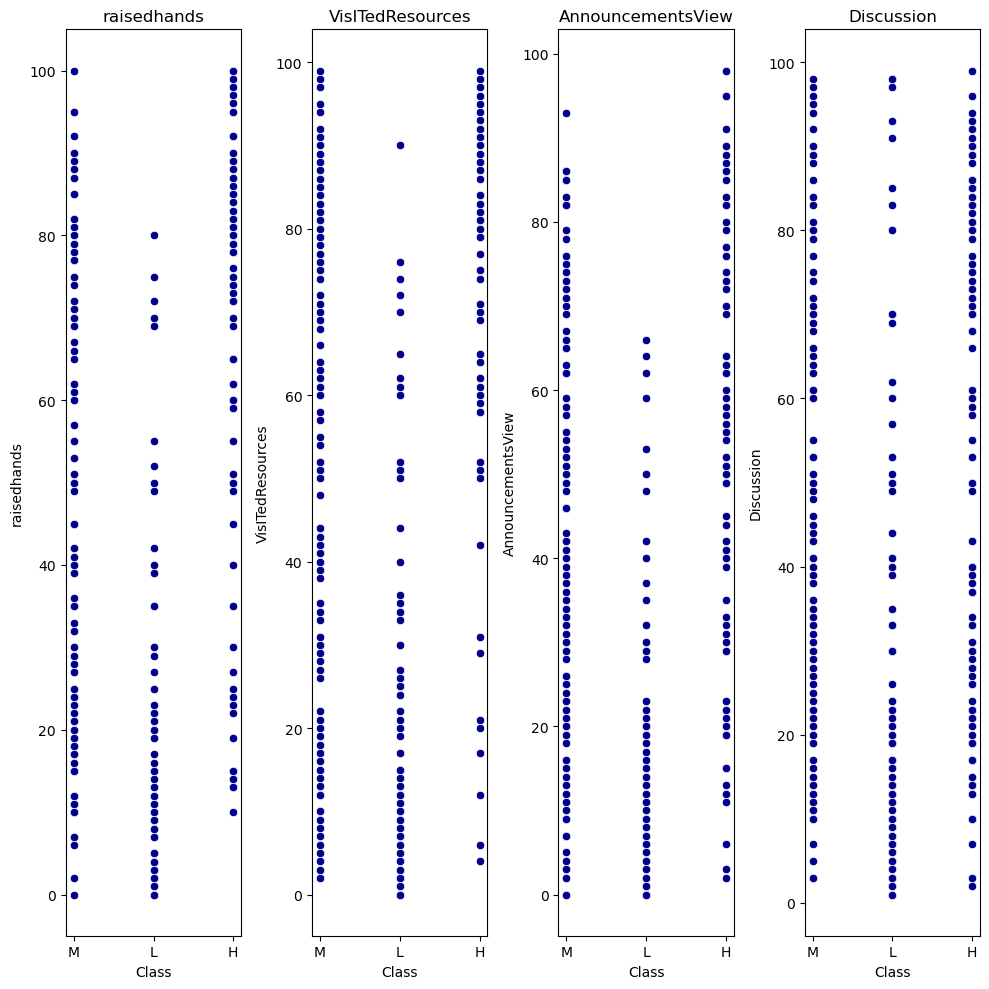

In [12]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_features):
    plt.subplot(1, 4, i + 1)
    sns.scatterplot(x="Class", y=df[column], data=df, color="darkblue")
    plt.title(column)
plt.tight_layout()
plt.show()

- 등급과 numerical 피처와의 관계를 표현합니다.


### 5. Pie Charts for Categorical Features


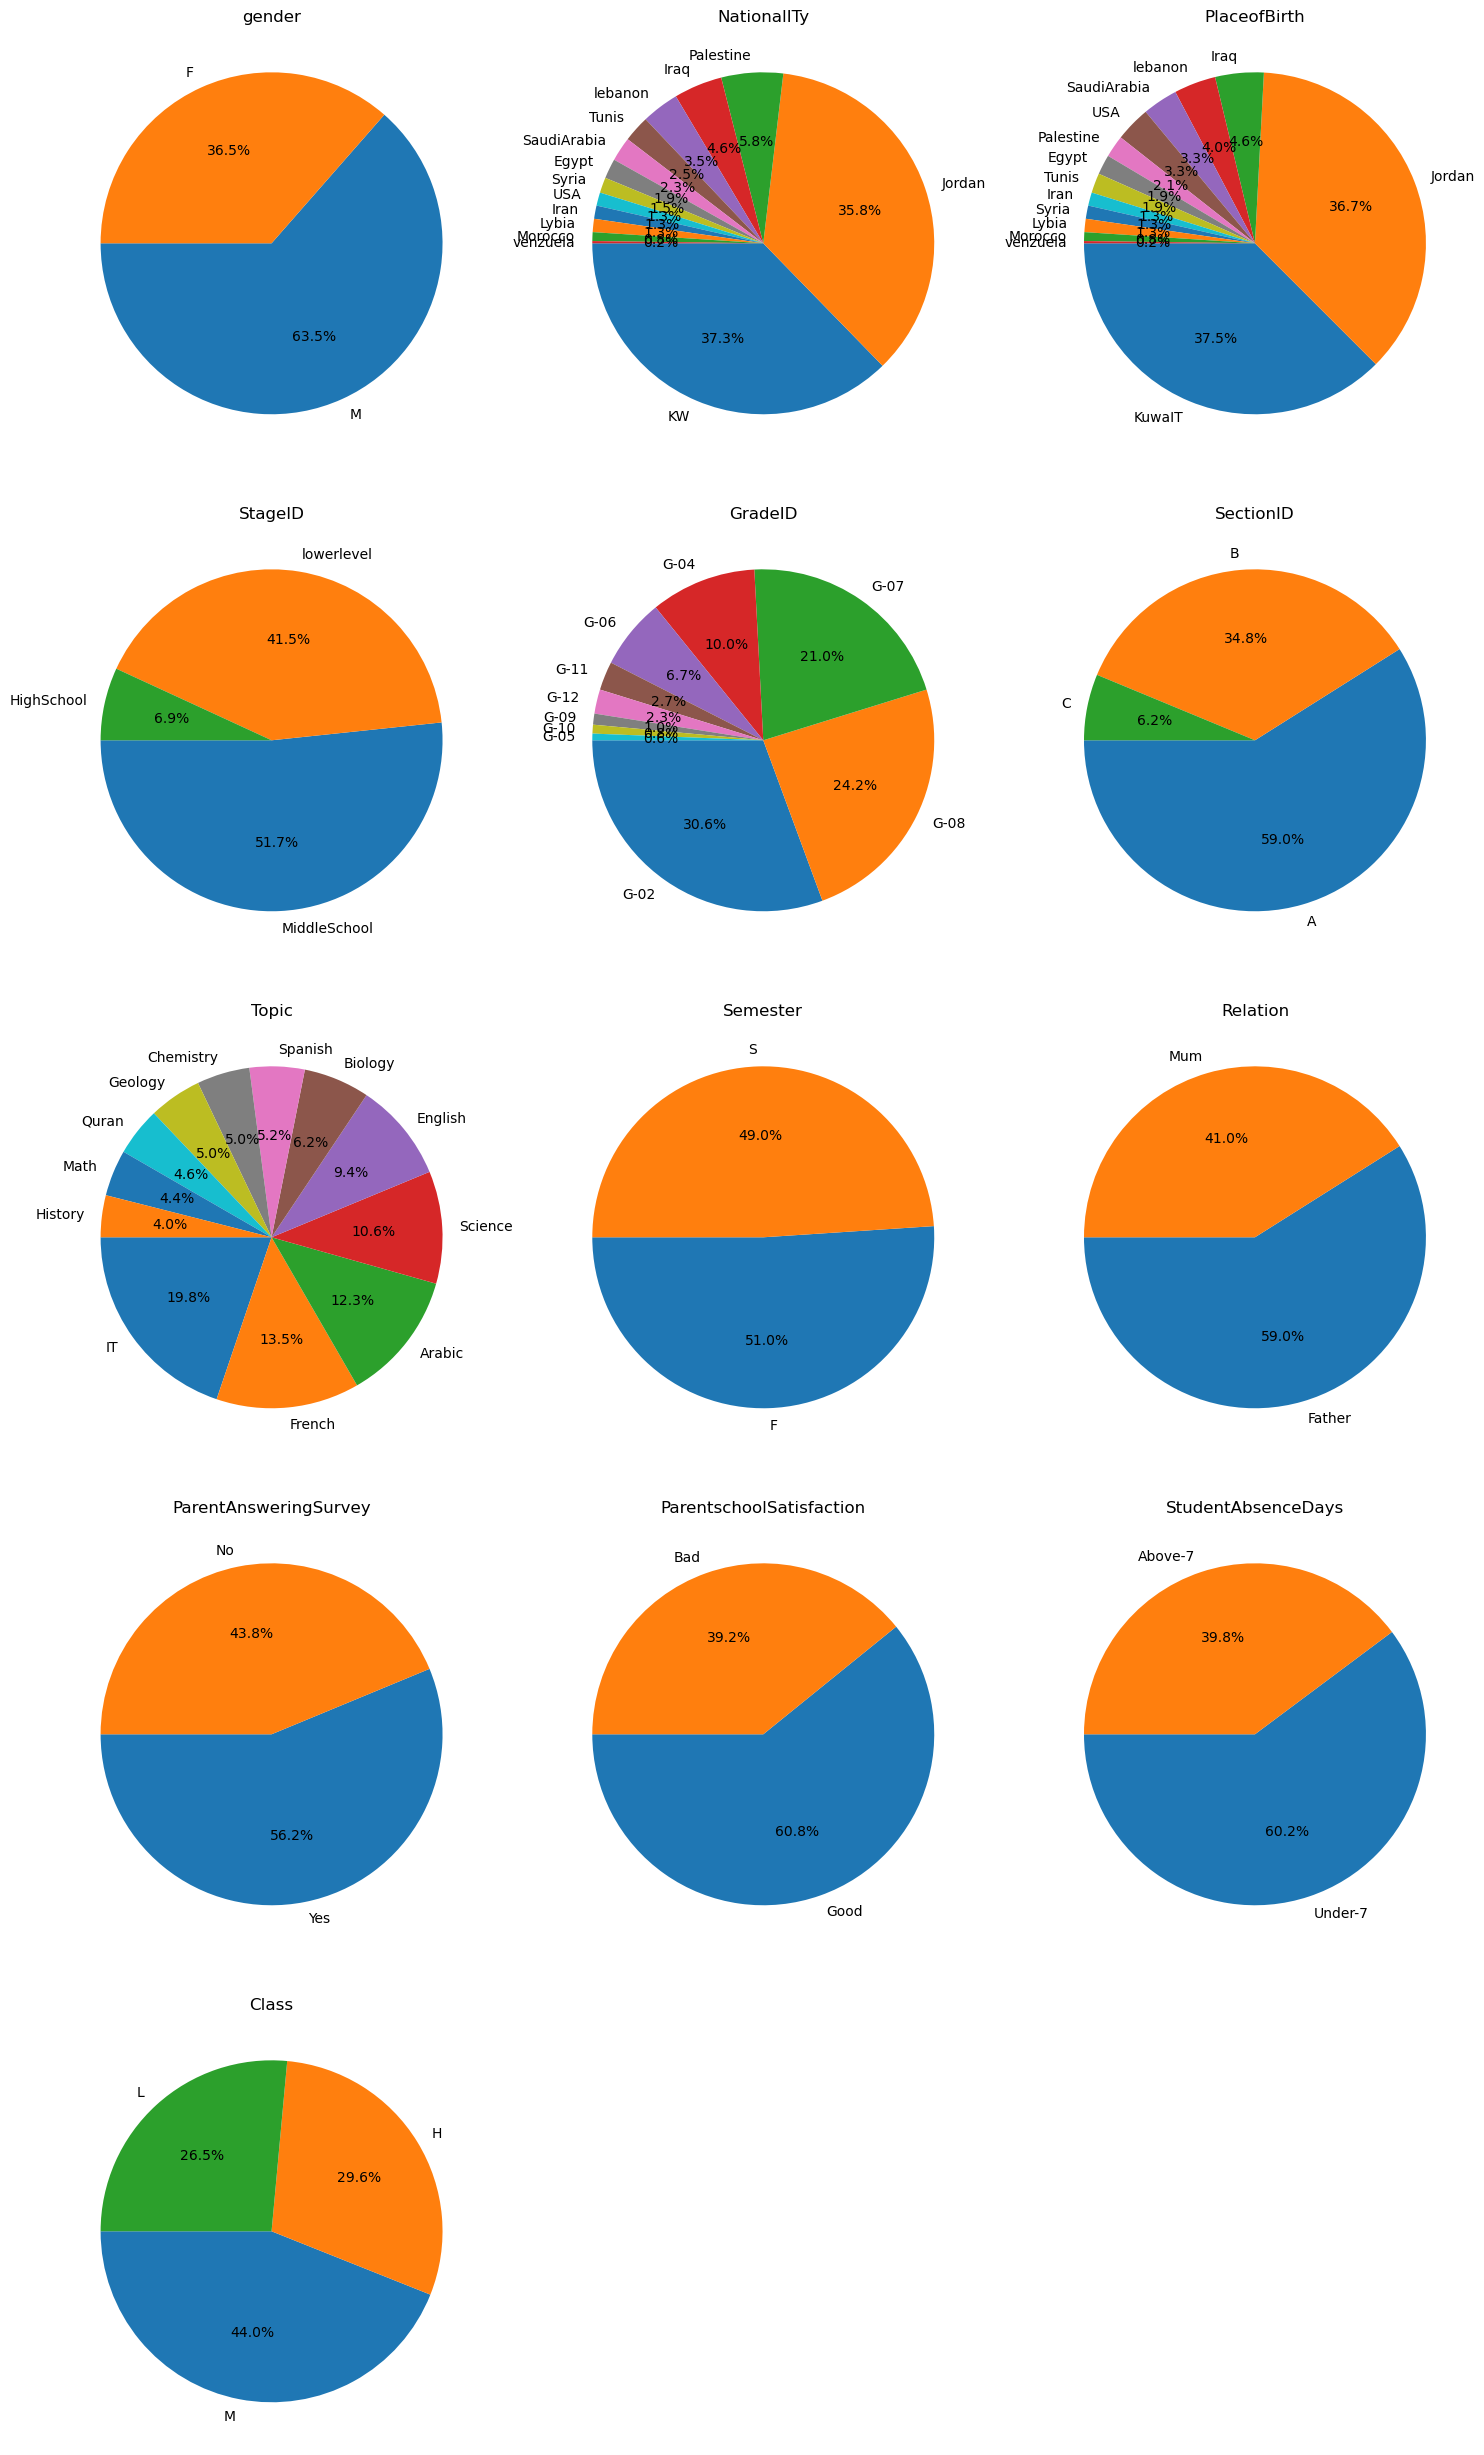

In [13]:
plt.figure(figsize=(15, 25))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(5, 3, i)
    plt.pie(
        df[col].value_counts(),
        labels=df[col].value_counts().index,
        autopct="%1.1f%%",
        startangle=180,
    )
    plt.title(col)
plt.tight_layout()
plt.show()

- 파이차트로 categorical 피쳐를 시각화합니다.


### 6. Gender Distribution


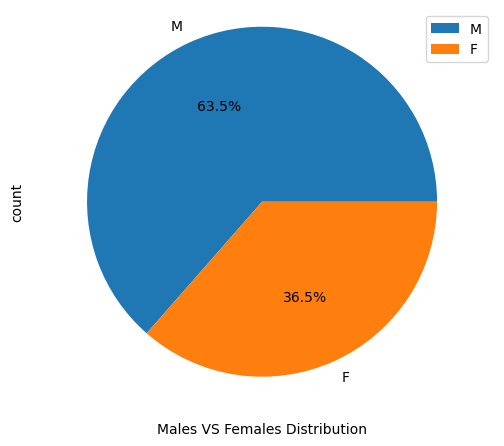

In [14]:
plt.figure(figsize=(6, 5))
counts = df["gender"].value_counts()
counts.plot(kind="pie", autopct="%1.1f%%")
plt.xlabel("Males VS Females Distribution", labelpad=20)
plt.axis("equal")
plt.legend(labels=counts.index, loc="best")
plt.show()

- 남성과 여성의 분포를 보여줍니다.


### 7. Grade Distribution By Gender


In [15]:
male_grades = df[df["gender"] == "M"]["Class"].value_counts()
female_grades = df[df["gender"] == "F"]["Class"].value_counts()

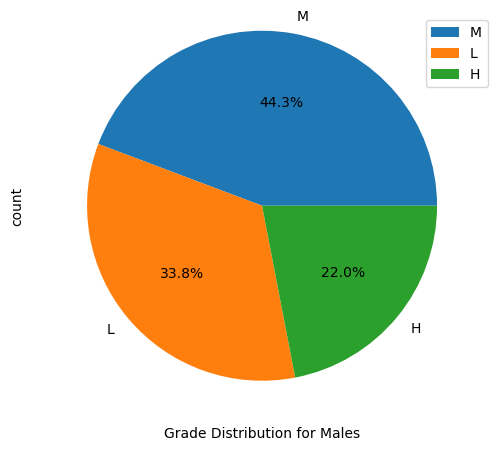

In [16]:
plt.figure(figsize=(6, 5))
male_grades.plot(kind="pie", autopct="%1.1f%%")
plt.xlabel("Grade Distribution for Males", labelpad=20)
plt.axis("equal")
plt.legend(labels=male_grades.index, loc="best")
plt.show()

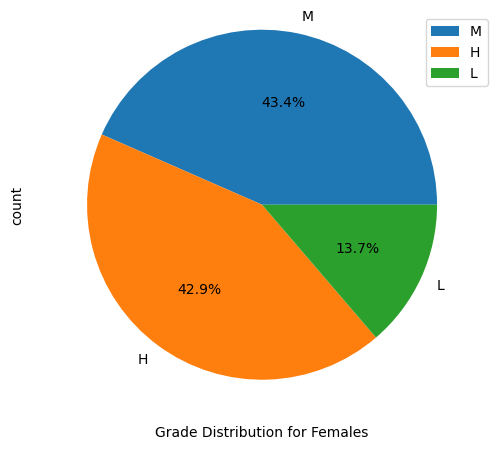

In [17]:
plt.figure(figsize=(6, 5))
female_grades.plot(kind="pie", autopct="%1.1f%%")
plt.xlabel("Grade Distribution for Females", labelpad=20)
plt.axis("equal")
plt.legend(labels=female_grades.index, loc="best")
plt.show()

- 남성과 여성간의 성적을 비교해볼 수 있었습니다.


### 8. Grade Distribution By Numerical Features


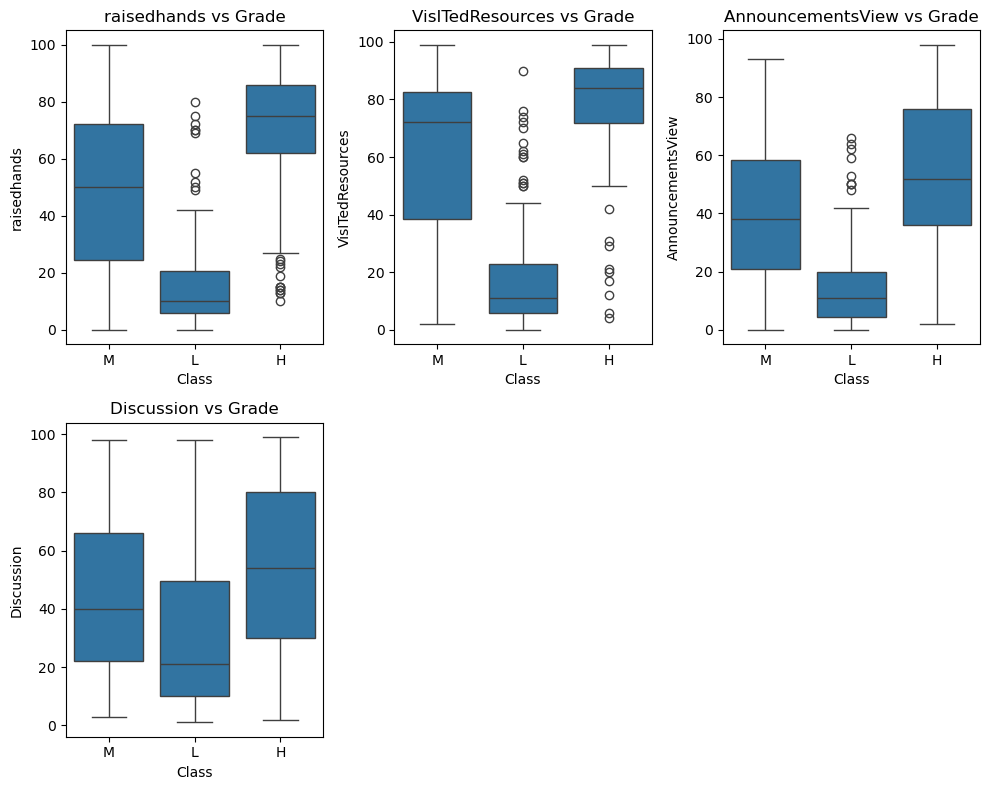

In [18]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_features, 1):
    ax = plt.subplot(2, 3, i)
    sns.boxplot(x=df["Class"], y=df[col], ax=ax)
    plt.title(f"{col} vs Grade")
plt.tight_layout()
plt.show()

- Numerical features와 성적간의 관계입니다.


### 9. Grade Distribution By Categorical Features


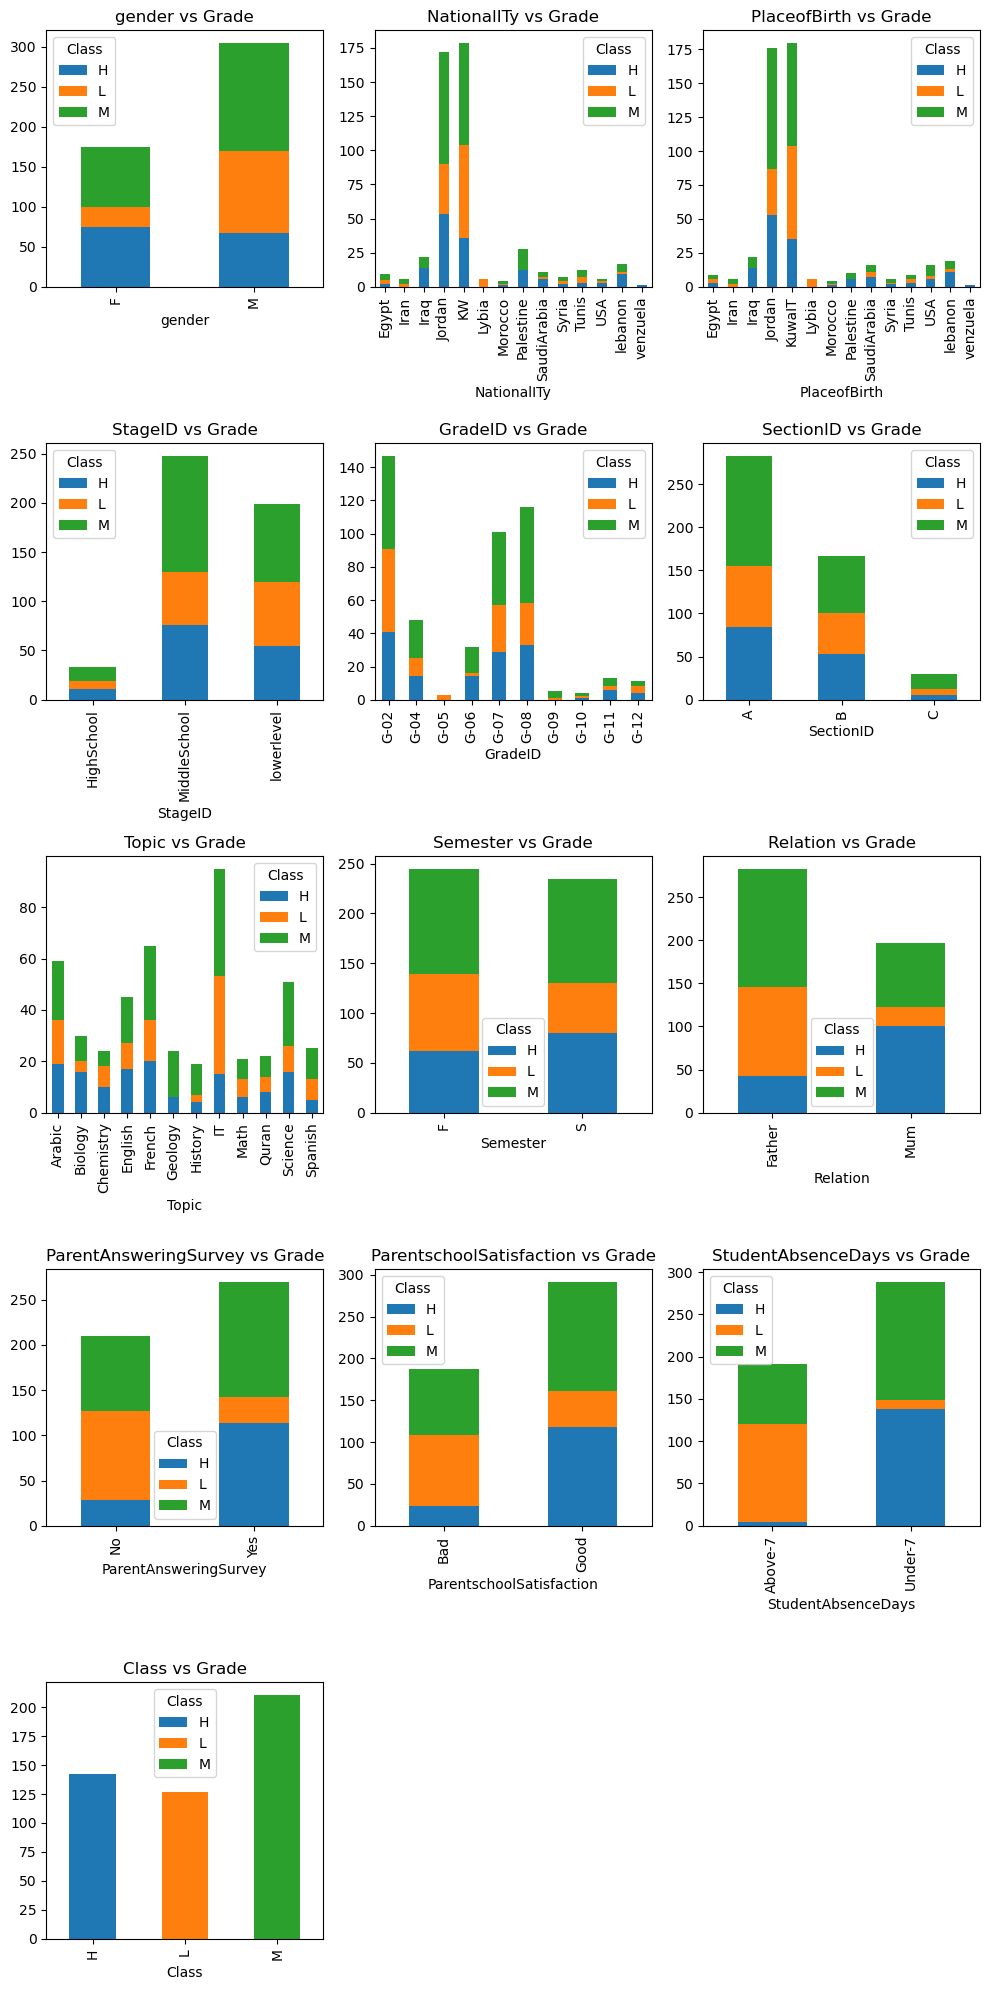

In [19]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(categorical_features, 1):
    tow_column = pd.crosstab(df[col], df["Class"])
    ax = plt.subplot(5, 3, i)
    tow_column.plot(kind="bar", stacked=True, ax=ax)
    plt.title(f"{col} vs Grade")
plt.tight_layout()
plt.show()

- 성적과 각 categorical 피쳐간의 관계입니다.


## Identify correlations ans patterns in student performance.


### Correlation Heatmap


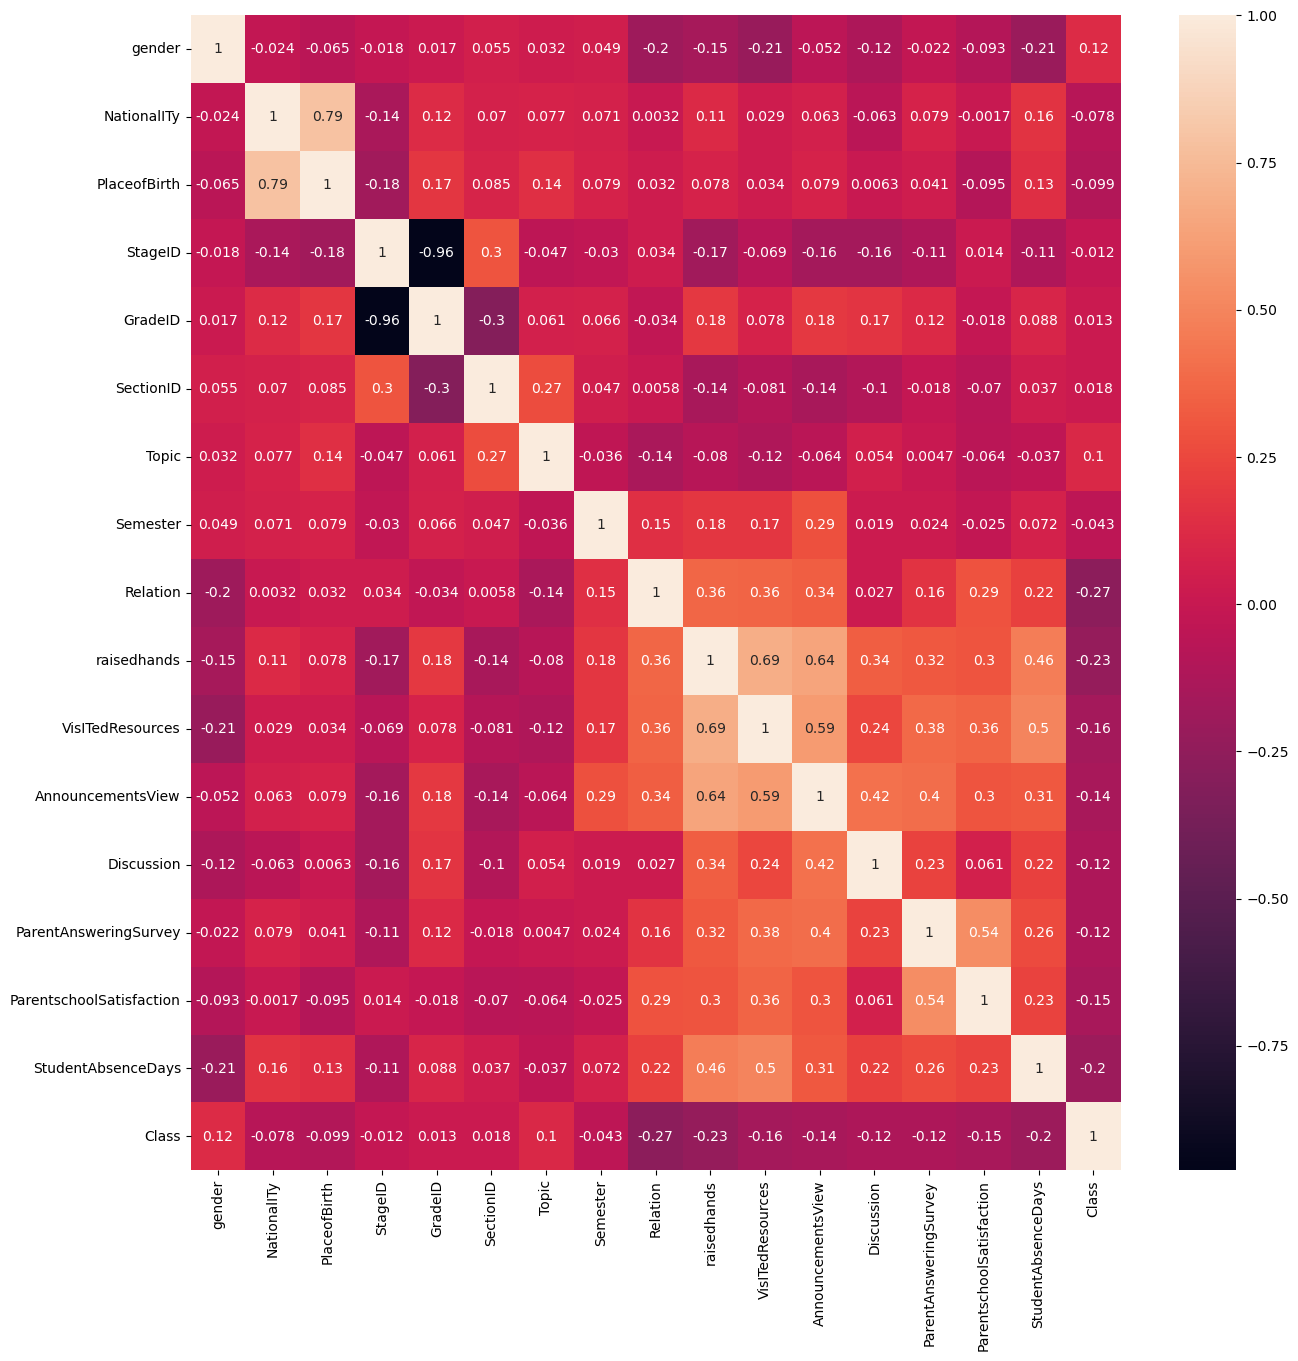

In [20]:
encoder = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = encoder.fit_transform(df[col])

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()

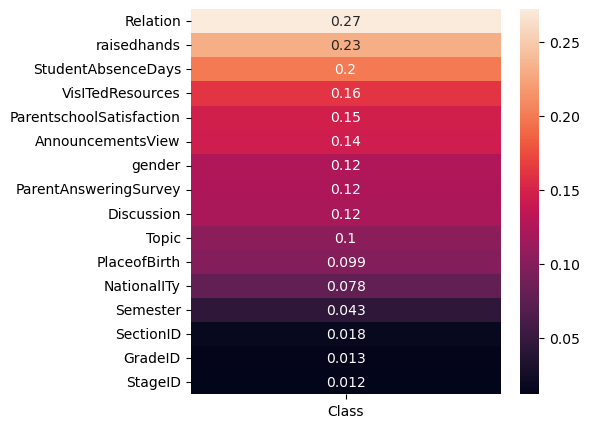

In [21]:
plt.figure(figsize=(5, 5))
sns.heatmap(
    df.corr()[["Class"]]
    .drop(index="Class")
    .apply(abs)
    .sort_values(by="Class", ascending=False),
    annot=True,
)
plt.show()

- 상관계수가 높은 컬럼들이 표시되었습니다.
